In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost as xgb

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.random.set_seed(13)

In [3]:
cd "/content/drive/My Drive/Colab Notebooks/smog"

/content/drive/My Drive/Colab Notebooks/smog


In [5]:
ls data

data_pm25_plus_darksky.csv


In [0]:
df = pd.read_csv('data/data_pm25_plus_darksky.csv')

In [0]:
df2=df

In [34]:
df.shape

(43853, 31)

In [35]:
df.head()

,Unnamed: 0,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
0,0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0
1,1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0
2,2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0
3,3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0
4,4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0


In [36]:
df.loc[df['date'] == '2019-11-30 23:00:00']

,Unnamed: 0,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
43108,43108,2019-11-30 23:00:00,30.0,23.3,23.6,26.96,0.0,29.0,0.83,clear-night,259.8,0.0024,0.0005,0.02,snow,1022.3,Clear,33.63,1.575151e+09,0.0,10.0,319.0,15.94,7.78,2019,11,30,23,6,48,0


In [0]:
TRAIN_SPLIT = 43108

In [38]:
df.head()

,Unnamed: 0,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
0,0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0
1,1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0
2,2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0
3,3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0
4,4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0


In [39]:
df.index = df['date']
df.head()

,Unnamed: 0,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0
2015-01-01 01:00:00,1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0
2015-01-01 02:00:00,2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0
2015-01-01 03:00:00,3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0
2015-01-01 04:00:00,4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0


In [40]:
#Usuwany niepotrzebne stacje
df.drop(['date', 'pm25_kon', 'pm25_wok','Unnamed: 0', 'time','year', 'month', 'day', 'hour'], axis = 1, inplace = True)
df.head()

,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [41]:
df.tail()

,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,,,,,
2019-12-31 19:00:00,11.6,34.07,0.82,34.28,0.75,partly-cloudy-night,335.4,0.0,0.0,0.0,NaN,1022.5,Mostly Cloudy,41.51,0.0,10.0,307.0,28.66,14.02,2,1,0
2019-12-31 20:00:00,12.4,33.26,0.59,34.00,0.76,partly-cloudy-night,336.1,0.0,0.0,0.0,NaN,1023.3,Partly Cloudy,40.97,0.0,10.0,307.0,27.30,14.39,2,1,0
2019-12-31 21:00:00,13.5,32.30,0.29,33.20,0.76,clear-night,337.8,0.0,0.0,0.0,NaN,1024.3,Clear,40.22,0.0,10.0,305.0,26.36,14.43,2,1,0
2019-12-31 22:00:00,10.8,31.28,0.05,32.37,0.76,clear-night,338.0,0.0,0.0,0.0,NaN,1025.1,Clear,39.35,0.0,10.0,303.0,25.92,14.14,2,1,0
2019-12-31 23:00:00,10.3,30.33,0.02,31.74,0.76,clear-night,334.5,0.0,0.0,0.0,NaN,1025.7,Clear,38.58,0.0,10.0,303.0,26.24,14.04,2,1,0


In [42]:
df.isnull().sum()

pm25_nie                   0
apparentTemperature        0
cloudCover                 0
dewPoint                   0
humidity                   0
icon                    1634
ozone                  30340
precipAccumulation         0
precipIntensity            0
precipProbability          0
precipType             38411
pressure                   0
summary                 1634
temperature                0
uvIndex                    0
visibility                 0
windBearing                0
windGust                   0
windSpeed                  0
day_of_week                0
no_of_week                 0
winter_break               0
dtype: int64

In [43]:
df = df.dropna(1)
df.head()

,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,0.0,0.0,0.0,1027.7,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,0.0,0.0,0.0,1027.7,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,0.0,0.0,0.0,1027.7,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,0.0,0.0,0.0,1027.7,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,0.0,0.0,0.0,1027.7,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [44]:
df.isnull().sum()

pm25_nie               0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
precipAccumulation     0
precipIntensity        0
precipProbability      0
pressure               0
temperature            0
uvIndex                0
visibility             0
windBearing            0
windGust               0
windSpeed              0
day_of_week            0
no_of_week             0
winter_break           0
dtype: int64

In [45]:
df.dtypes

pm25_nie               float64
apparentTemperature    float64
cloudCover             float64
dewPoint               float64
humidity               float64
precipAccumulation     float64
precipIntensity        float64
precipProbability      float64
pressure               float64
temperature            float64
uvIndex                float64
visibility             float64
windBearing            float64
windGust               float64
windSpeed              float64
day_of_week              int64
no_of_week               int64
winter_break             int64
dtype: object

In [46]:
df.head()

,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,0.0,0.0,0.0,1027.7,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,0.0,0.0,0.0,1027.7,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,0.0,0.0,0.0,1027.7,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,0.0,0.0,0.0,1027.7,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,0.0,0.0,0.0,1027.7,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [0]:
df.to_csv(r'/content/drive/My Drive/Colab Notebooks/smog/data/smog_deleted', header = True)

standarization

### LSTM - tensorflow


In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
EVALUATION_INTERVAL = 200
EPOCHS = 30
TRAIN_SPLIT = 43108

BATCH_SIZE - to hiperparametr, który określa liczbę próbek do przejścia przed aktualizacją parametrów modelu wewnętrznego.


BUFFER_SIZE - 
EVALUATION_INTERVAL - określa ile kroków jest wykonywanych w epoce


EPOCHS - to hiperparametr, który określa liczbę próbek do przejścia przed aktualizacją parametrów modelu wewnętrznego.


TRAIN_SPLIT = 43108

In [0]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/smog/data/smog_deleted')

In [12]:
df2.head()

,date,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
0,2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,0.0,0.0,0.0,1027.7,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
1,2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,0.0,0.0,0.0,1027.7,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2,2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,0.0,0.0,0.0,1027.7,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
3,2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,0.0,0.0,0.0,1027.7,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
4,2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,0.0,0.0,0.0,1027.7,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [13]:
df2.index = df2['date']
df2.head()

,date,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,0.0,0.0,0.0,1027.7,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 01:00:00,2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,0.0,0.0,0.0,1027.7,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 02:00:00,2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,0.0,0.0,0.0,1027.7,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 03:00:00,2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,0.0,0.0,0.0,1027.7,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
2015-01-01 04:00:00,2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,0.0,0.0,0.0,1027.7,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [14]:
#Usuwany niepotrzebne stacje
df2.drop(['date'], axis = 1, inplace = True)
df2.head()

,pm25_nie,apparentTemperature,cloudCover,dewPoint,humidity,precipAccumulation,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,day_of_week,no_of_week,winter_break
date,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,51.5034,32.93,1.0,29.56,0.87,0.0,0.0,0.0,1027.7,32.93,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 01:00:00,71.8204,33.90,1.0,31.11,0.89,0.0,0.0,0.0,1027.7,33.90,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 02:00:00,42.6996,27.73,1.0,31.59,0.91,0.0,0.0,0.0,1027.7,33.81,0.0,2.733,260.0,6.93,6.93,4,1,0
2015-01-01 03:00:00,38.2824,27.73,1.0,32.76,0.96,0.0,0.0,0.0,1027.7,33.81,0.0,1.244,251.0,6.93,6.93,4,1,0
2015-01-01 04:00:00,35.4194,26.41,1.0,32.89,0.97,0.0,0.0,0.0,1027.7,33.73,0.0,1.152,251.0,8.96,8.96,4,1,0


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

dataset = scaler.fit_transform(df2)


In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)


In [0]:
past_history = 7*24
future_target = 3*24
STEP = 1


x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 0], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 0],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)


In [28]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target pm2.5 to predict : {}'.format(y_train_multi[0].shape))


Single window of past history : (240, 18)

 Target pm2.5 to predict : (72,)


In [0]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))


In [0]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()


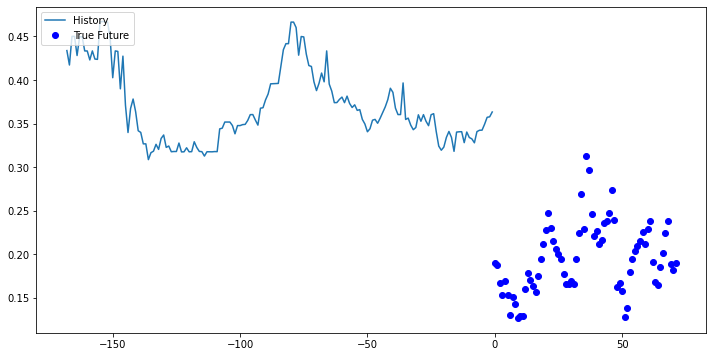

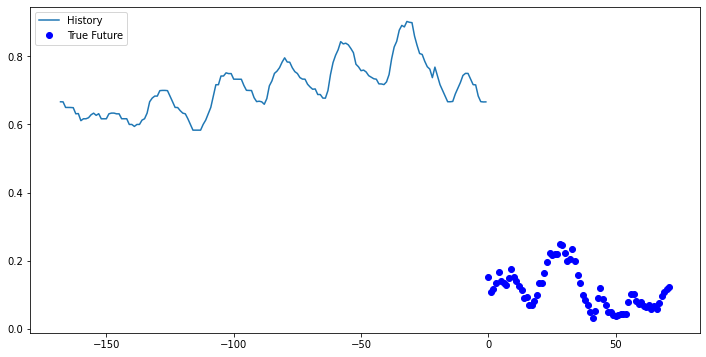

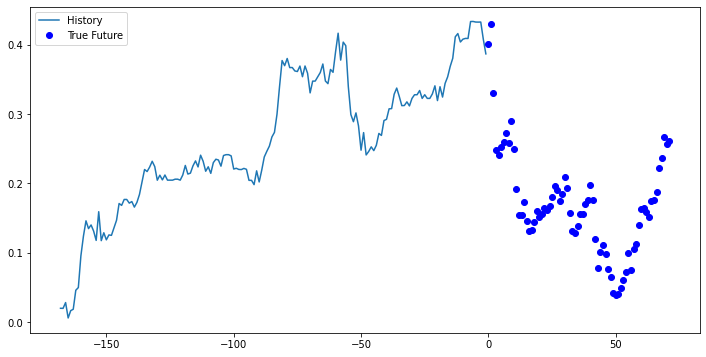

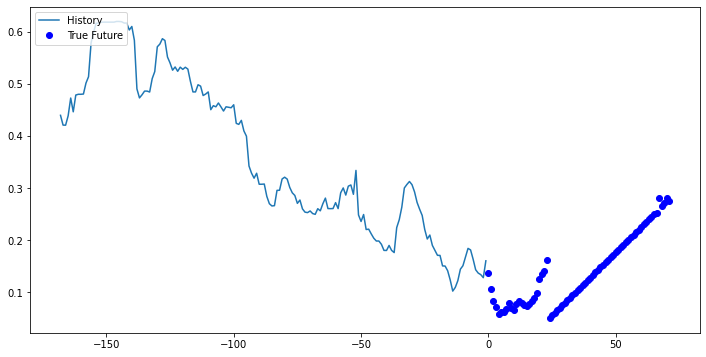

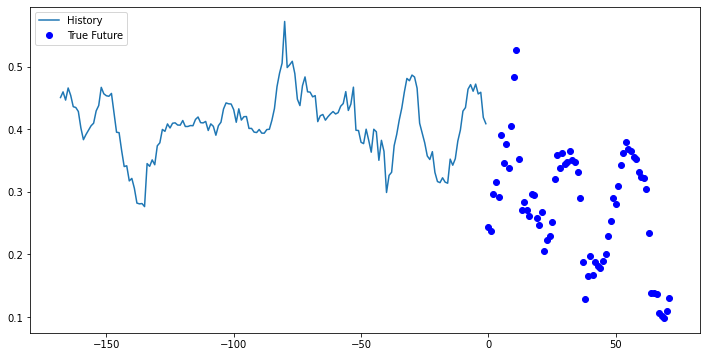

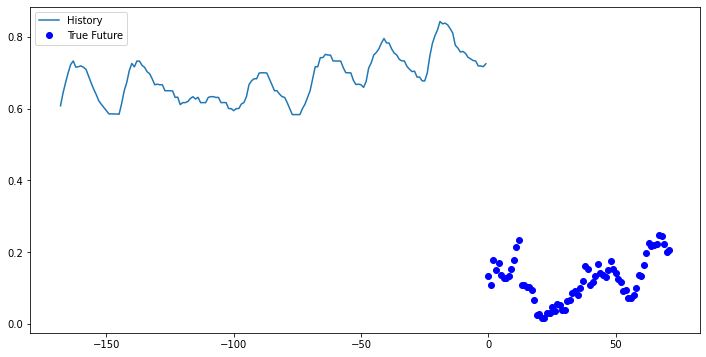

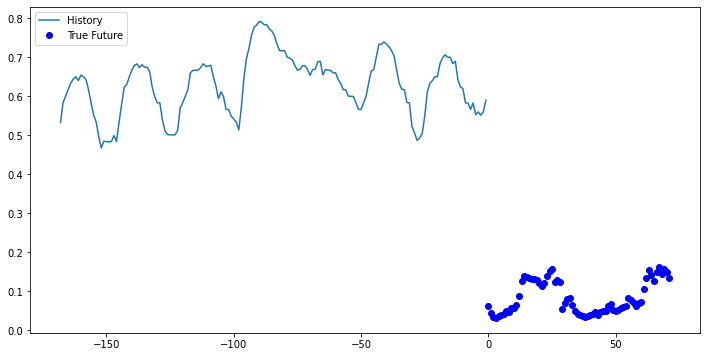

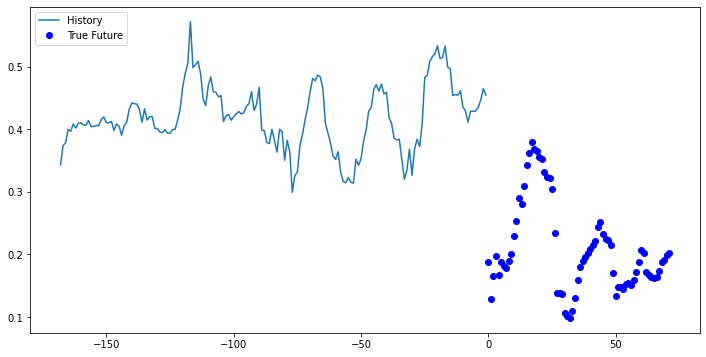

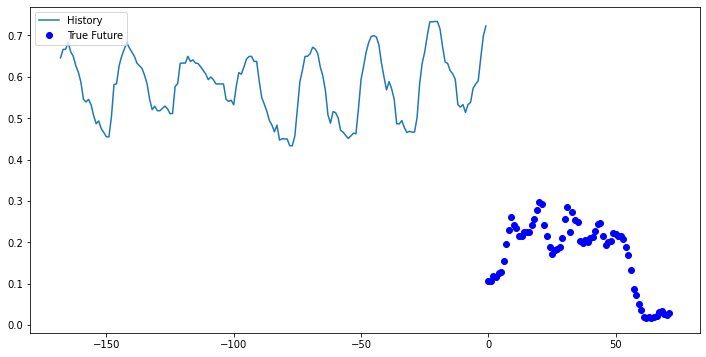

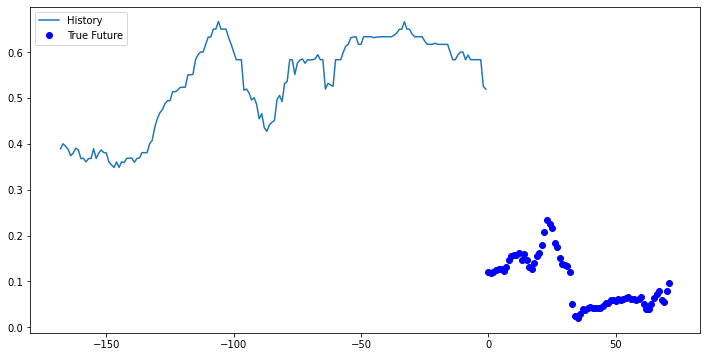

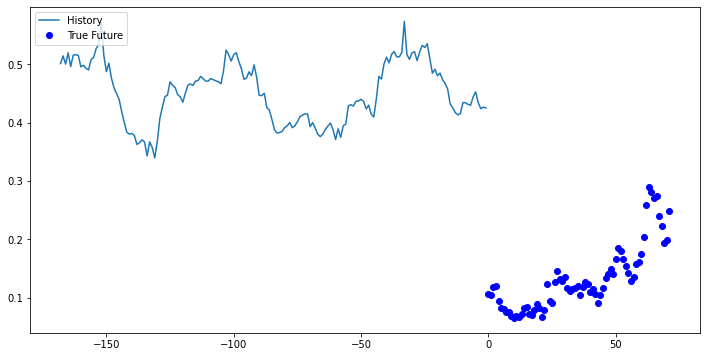

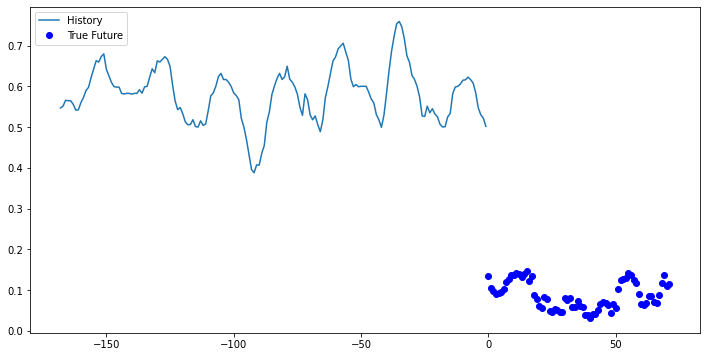

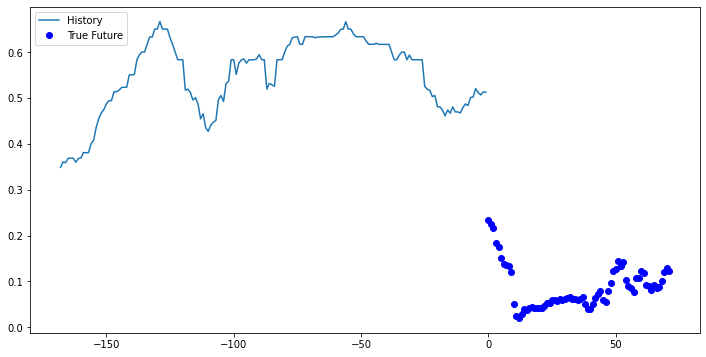

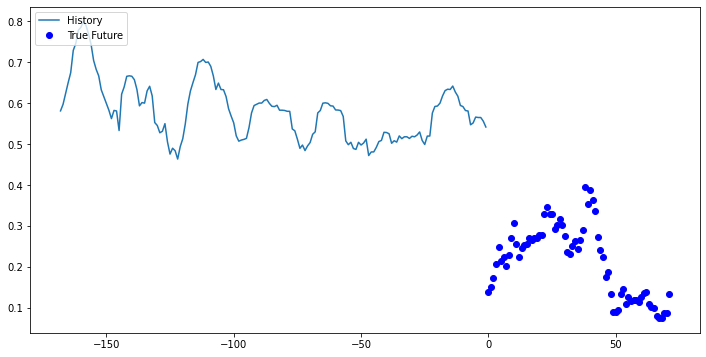

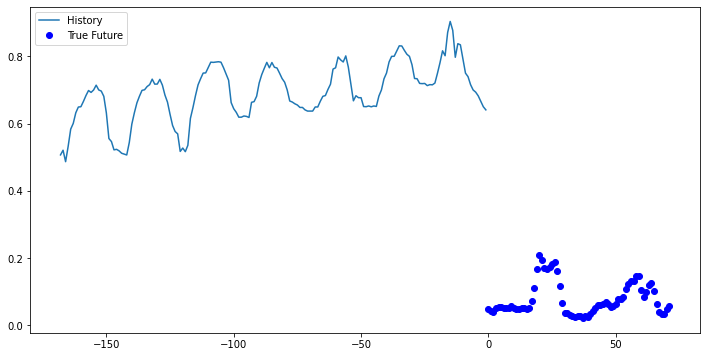

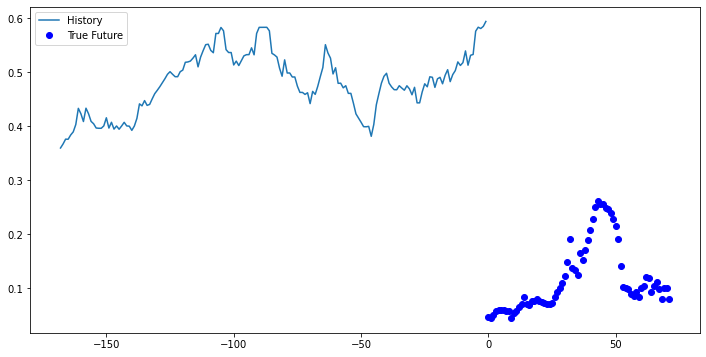

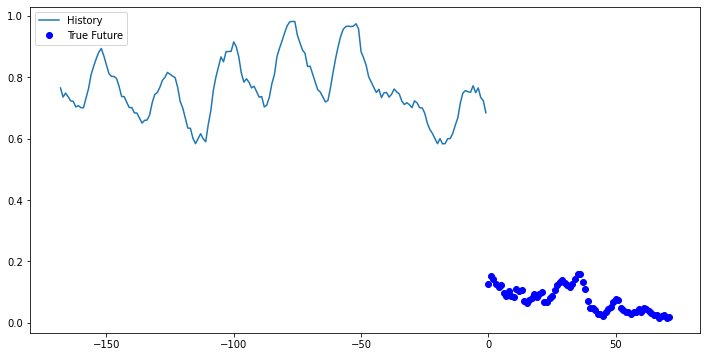

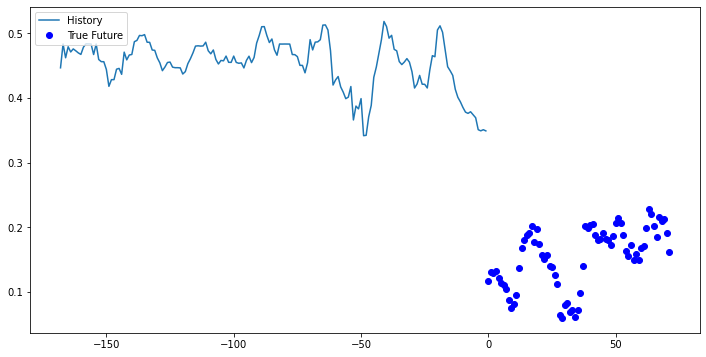

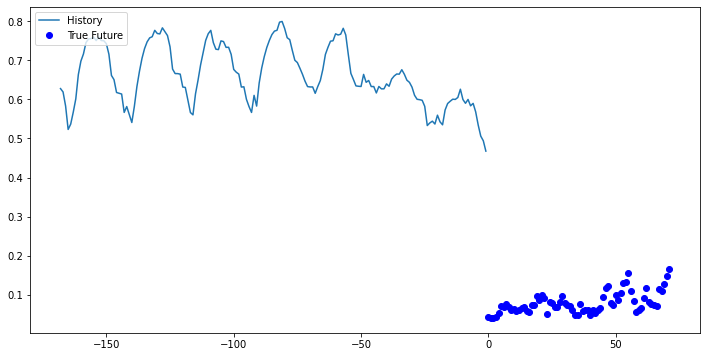

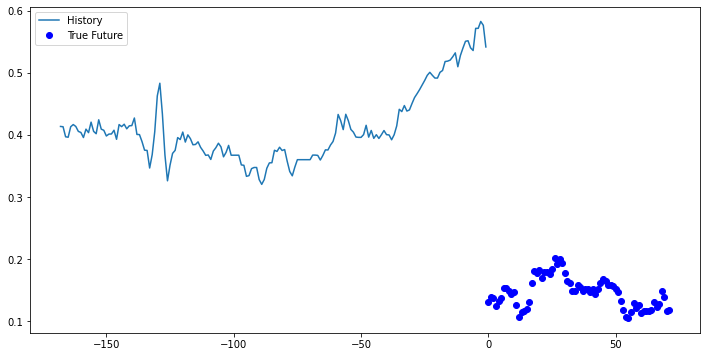

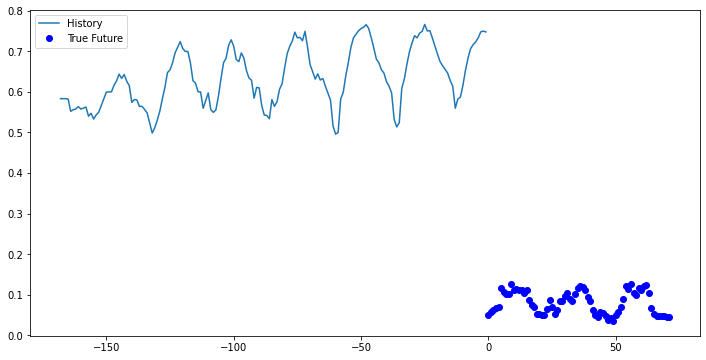

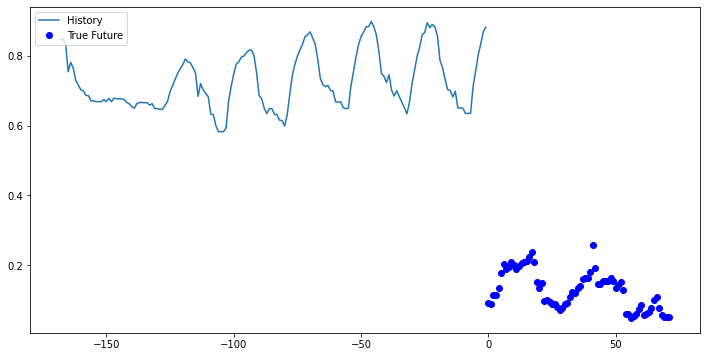

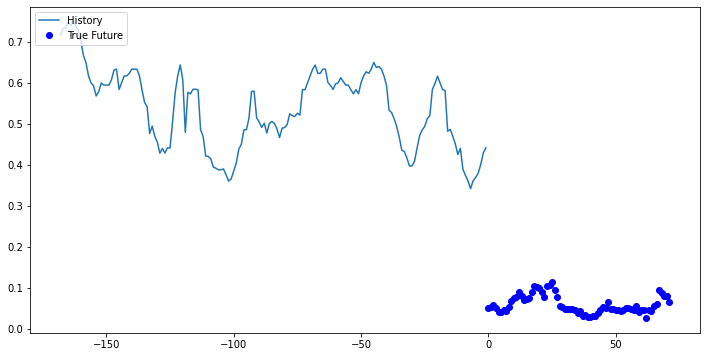

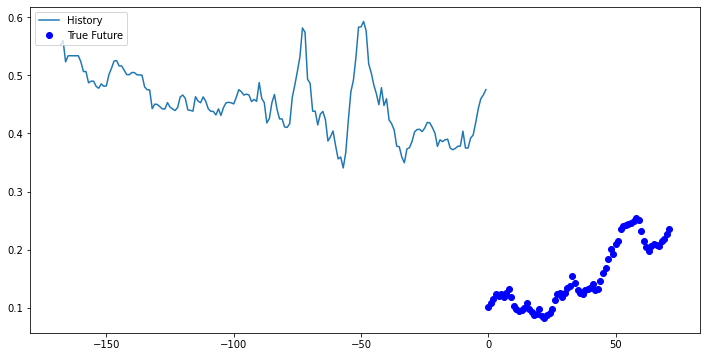

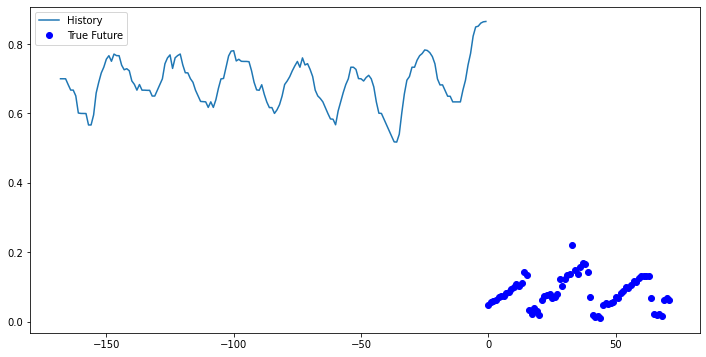

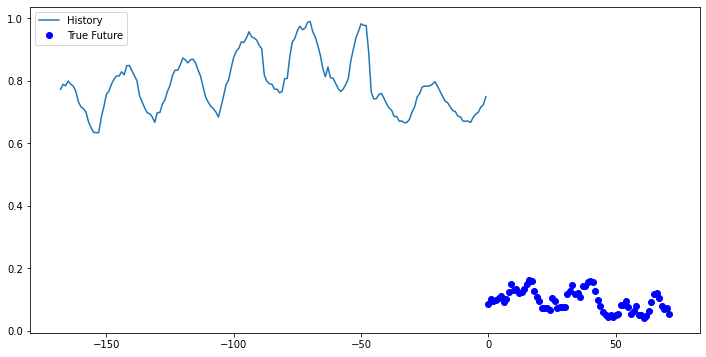

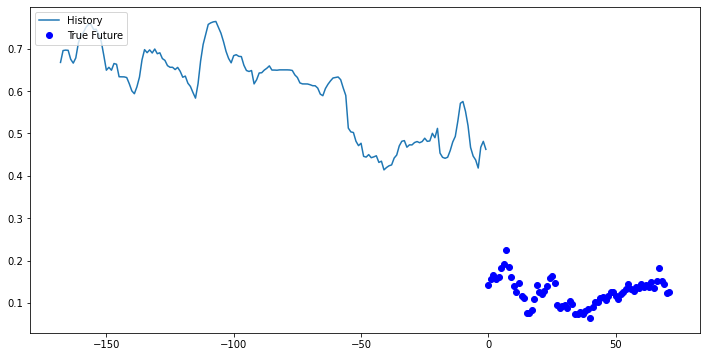

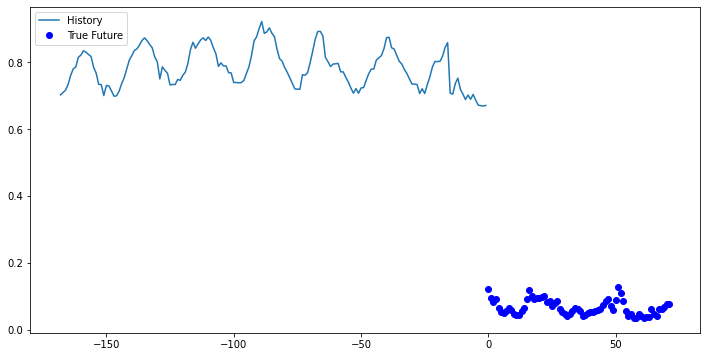

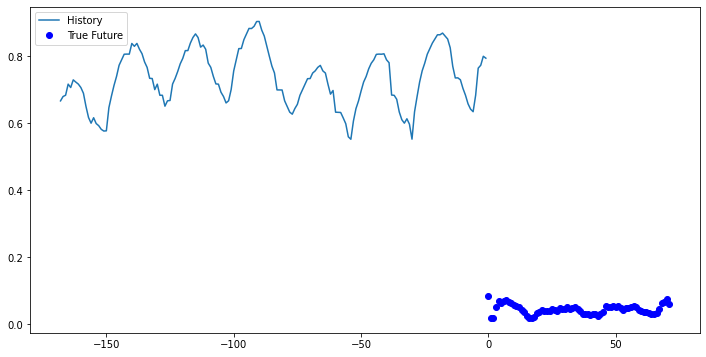

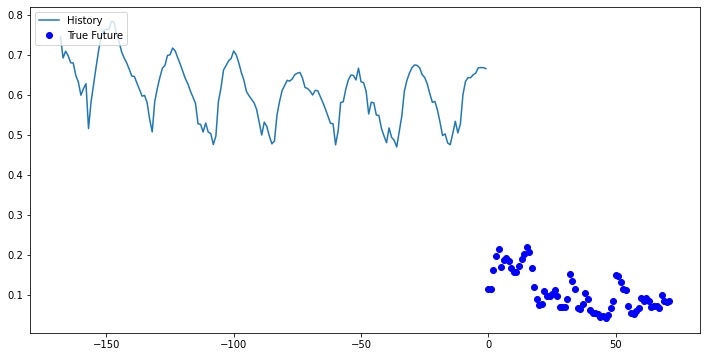

In [18]:
for x, y in train_data_multi.take(30):
  multi_step_plot(x[0], y[0], np.array([0]))


In [32]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')


In [33]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)


(256, 72)


In [45]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)


Epoch 1/30
200/200 [==============================] - 44s 222ms/step - loss: 0.0615 - val_loss: 0.0481
Epoch 2/30
200/200 [==============================] - 44s 220ms/step - loss: 0.0508 - val_loss: 0.0444
Epoch 3/30
200/200 [==============================] - 44s 222ms/step - loss: 15.5351 - val_loss: 0.0443
Epoch 4/30
200/200 [==============================] - 44s 221ms/step - loss: 0.0482 - val_loss: 0.0422
Epoch 5/30
200/200 [==============================] - 44s 220ms/step - loss: 0.0470 - val_loss: 0.0416
Epoch 6/30
200/200 [==============================] - 44s 222ms/step - loss: 0.0473 - val_loss: 0.0443
Epoch 7/30
200/200 [==============================] - 45s 223ms/step - loss: 0.9605 - val_loss: 0.0451
Epoch 8/30
200/200 [==============================] - 45s 223ms/step - loss: 0.0465 - val_loss: 0.0460
Epoch 9/30
200/200 [==============================] - 45s 224ms/step - loss: 0.0456 - val_loss: 0.0433
Epoch 10/30
200/200 [==============================] - 45s 227ms/step - 

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


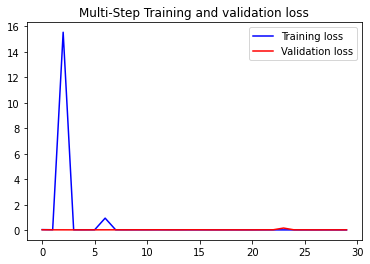

In [47]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


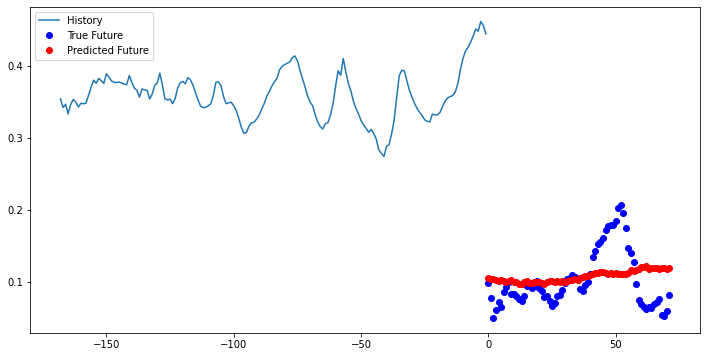

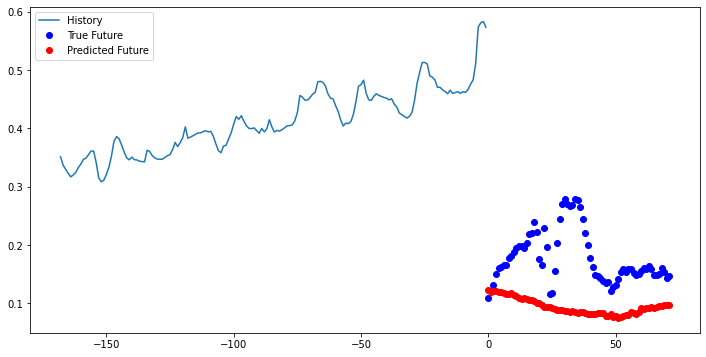

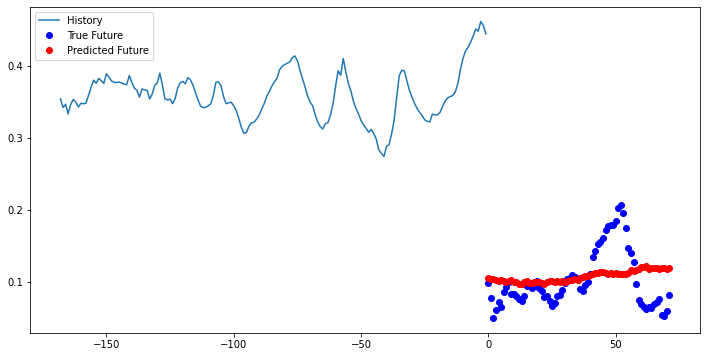

In [48]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])


#model 2 

In [59]:
multi_step_model2 = tf.keras.models.Sequential()
multi_step_model2.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
                                          
multi_step_model2.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,activation='relu'))
multi_step_model2.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model2.add(tf.keras.layers.Dense(72))

multi_step_model2.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [60]:
multi_step_model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 168, 32)           6528      
_________________________________________________________________
lstm_14 (LSTM)               (None, 168, 32)           8320      
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_6 (Dense)              (None, 72)                1224      
Total params: 19,208
Trainable params: 19,208
Non-trainable params: 0
_________________________________________________________________


In [61]:
multi_step_history = multi_step_model2.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 87s 435ms/step - loss: 0.0638 - val_loss: 0.0492
Epoch 2/30
200/200 [==============================] - 86s 432ms/step - loss: 0.0515 - val_loss: 0.0495
Epoch 3/30
200/200 [==============================] - 85s 427ms/step - loss: 0.0498 - val_loss: 0.0485
Epoch 4/30
200/200 [==============================] - 86s 428ms/step - loss: 0.0481 - val_loss: 0.0497
Epoch 5/30
200/200 [==============================] - 87s 433ms/step - loss: 0.0459 - val_loss: 0.0541
Epoch 6/30
200/200 [==============================] - 85s 427ms/step - loss: 0.0458 - val_loss: 0.0482
Epoch 7/30
200/200 [==============================] - 85s 423ms/step - loss: 0.0454 - val_loss: 0.0452
Epoch 8/30
200/200 [==============================] - 84s 422ms/step - loss: 0.7484 - val_loss: 0.0620
Epoch 9/30
200/200 [==============================] - 84s 422ms/step - loss: 0.0434 - val_loss: 0.0487
Epoch 10/30
200/200 [==============================] - 84s 421ms/step - l

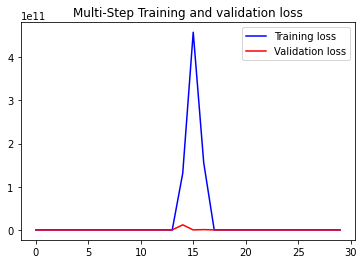

In [62]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

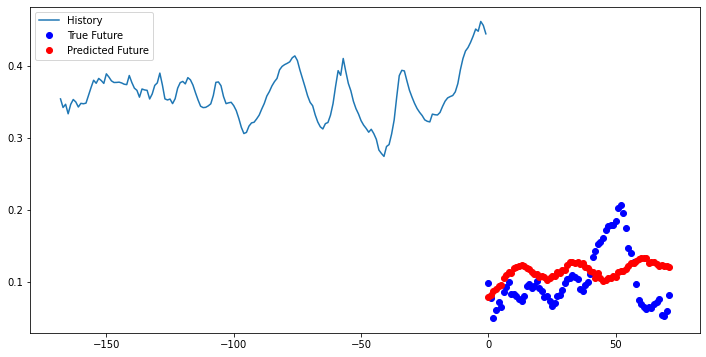

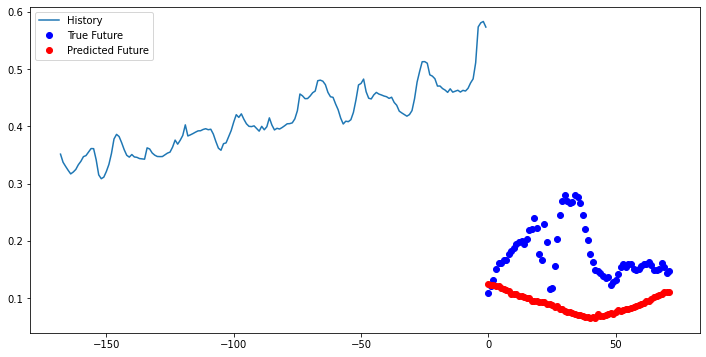

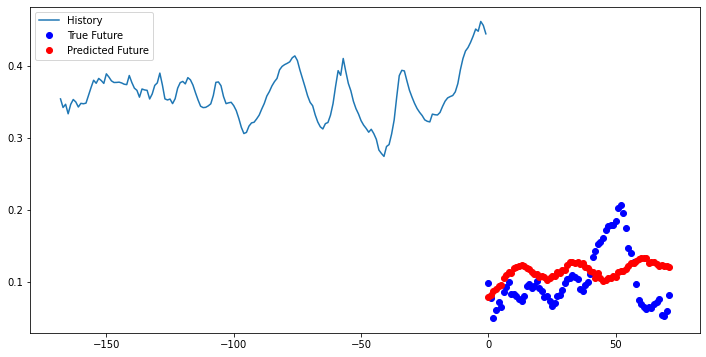

In [63]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model2.predict(x)[0])

#model 3

In [68]:
multi_step_model3 = tf.keras.models.Sequential()
multi_step_model3.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model3.add(Dropout(0.2))
multi_step_model3.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,activation='relu'))
multi_step_model3.add(Dropout(0.2))
multi_step_model3.add(tf.keras.layers.LSTM(16, return_sequences=True, activation='relu'))
multi_step_model3.add(Dropout(0.2))
multi_step_model3.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model3.add(Dropout(0.2))
multi_step_model3.add(tf.keras.layers.Dense(72))

multi_step_model3.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [69]:
multi_step_model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 168, 32)           6528      
_________________________________________________________________
dropout_11 (Dropout)         (None, 168, 32)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 168, 32)           8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 168, 32)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 168, 16)           3136      
_________________________________________________________________
dropout_13 (Dropout)         (None, 168, 16)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 16)              

In [70]:
multi_step_history3 = multi_step_model3.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 136s 679ms/step - loss: 0.0628 - val_loss: 0.0458
Epoch 2/30
200/200 [==============================] - 130s 652ms/step - loss: 0.0526 - val_loss: 0.0453
Epoch 3/30
200/200 [==============================] - 128s 640ms/step - loss: 1896414720.0000 - val_loss: 0.0459
Epoch 4/30
200/200 [==============================] - 129s 644ms/step - loss: 0.0977 - val_loss: 0.0434
Epoch 5/30
200/200 [==============================] - 130s 651ms/step - loss: 0.0486 - val_loss: 0.0424
Epoch 6/30
200/200 [==============================] - 128s 642ms/step - loss: 252265.2812 - val_loss: 0.0487
Epoch 7/30
200/200 [==============================] - 132s 658ms/step - loss: 168.0609 - val_loss: 0.0461
Epoch 8/30
200/200 [==============================] - 132s 659ms/step - loss: 41.7618 - val_loss: 0.0448
Epoch 9/30
200/200 [==============================] - 131s 654ms/step - loss: 0.0484 - val_loss: 0.0454
Epoch 10/30
200/200 [==========================

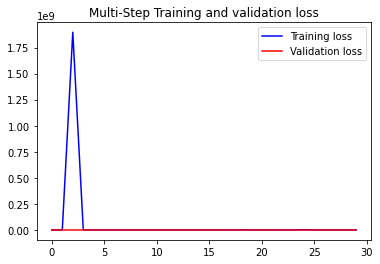

In [71]:
plot_train_history(multi_step_history3, 'Multi-Step Training and validation loss')

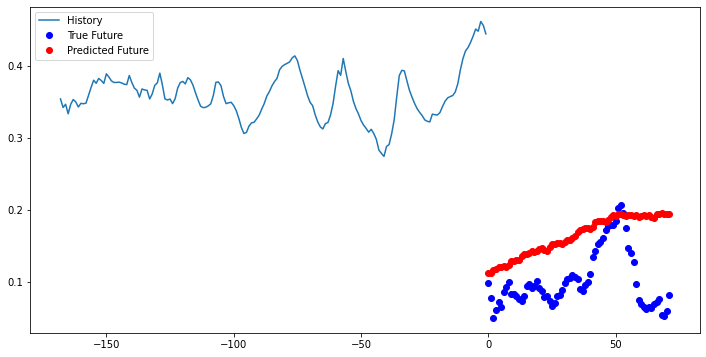

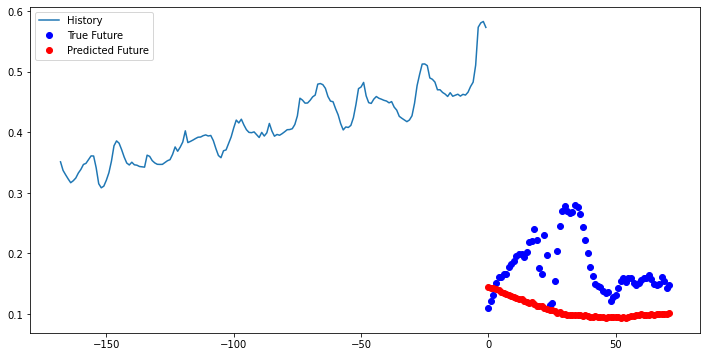

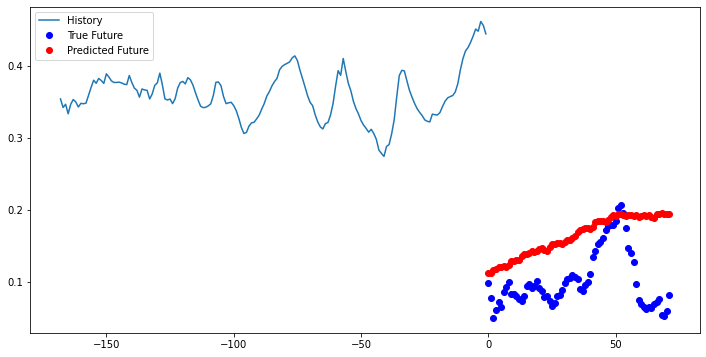

In [72]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model3.predict(x)[0])

#model 4

In [74]:
multi_step_model4 = tf.keras.models.Sequential()
multi_step_model4.add(tf.keras.layers.LSTM(100,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model4.add(Dropout(0.2))
multi_step_model4.add(tf.keras.layers.LSTM(50, activation='relu'))
multi_step_model4.add(Dropout(0.2))
multi_step_model4.add(tf.keras.layers.Dense(72))

multi_step_model4.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [75]:
multi_step_model4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 168, 100)          47600     
_________________________________________________________________
dropout_15 (Dropout)         (None, 168, 100)          0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 72)                3672      
Total params: 81,472
Trainable params: 81,472
Non-trainable params: 0
_________________________________________________________________


In [76]:
multi_step_histor4 = multi_step_model4.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 47s 237ms/step - loss: 0.0589 - val_loss: 0.0599
Epoch 2/30
200/200 [==============================] - 46s 230ms/step - loss: 0.0502 - val_loss: 0.0488
Epoch 3/30
200/200 [==============================] - 46s 232ms/step - loss: 187283273678848.0000 - val_loss: 0.0474
Epoch 4/30
200/200 [==============================] - 47s 234ms/step - loss: 0.0474 - val_loss: 0.0444
Epoch 5/30
200/200 [==============================] - 46s 231ms/step - loss: 0.0458 - val_loss: 0.0459
Epoch 6/30
200/200 [==============================] - 47s 233ms/step - loss: 395644.3750 - val_loss: 0.0471
Epoch 7/30
200/200 [==============================] - 46s 231ms/step - loss: 0.0459 - val_loss: 0.0527
Epoch 8/30
200/200 [==============================] - 45s 226ms/step - loss: 0.0446 - val_loss: 0.0536
Epoch 9/30
200/200 [==============================] - 45s 224ms/step - loss: 0.0431 - val_loss: 0.0585
Epoch 10/30
200/200 [==============================] -

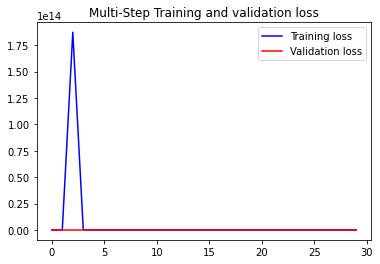

In [78]:
plot_train_history(multi_step_histor4, 'Multi-Step Training and validation loss')

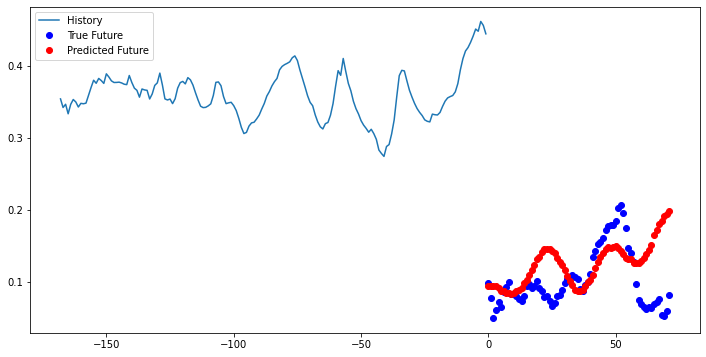

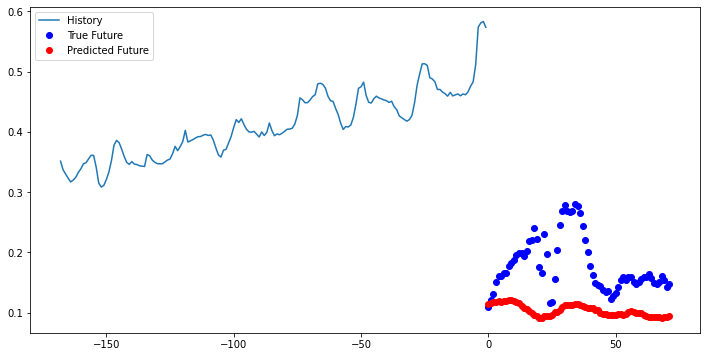

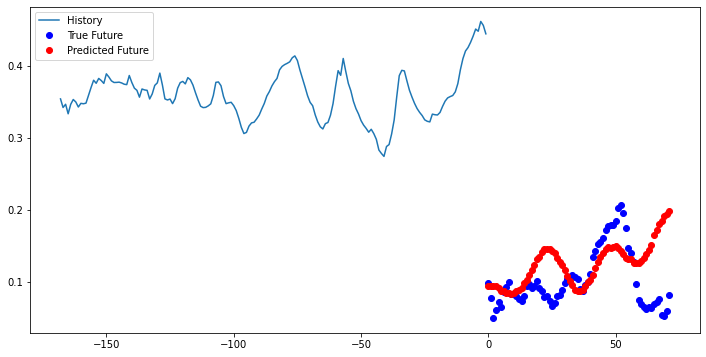

In [79]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model4.predict(x)[0])

#model 5

In [29]:
multi_step_model5 = tf.keras.models.Sequential()
multi_step_model5.add(tf.keras.layers.LSTM(168,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model5.add(tf.keras.layers.LSTM(168,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model5.add(Dropout(0.2))
multi_step_model5.add(tf.keras.layers.LSTM(100, activation='relu'))
multi_step_model5.add(Dropout(0.2))
multi_step_model5.add(tf.keras.layers.Dense(72))

multi_step_model5.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [30]:
multi_step_history5 = multi_step_model5.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 53s 265ms/step - loss: 0.0591 - val_loss: 0.0496
Epoch 2/30
200/200 [==============================] - 53s 263ms/step - loss: 0.0501 - val_loss: 0.0812
Epoch 3/30
200/200 [==============================] - 54s 270ms/step - loss: 0.0478 - val_loss: 0.0454
Epoch 4/30
200/200 [==============================] - 54s 271ms/step - loss: 0.0459 - val_loss: 0.0492
Epoch 5/30
200/200 [==============================] - 53s 267ms/step - loss: 0.0435 - val_loss: 0.0472
Epoch 6/30
200/200 [==============================] - 52s 261ms/step - loss: 0.0426 - val_loss: 0.0464
Epoch 7/30
200/200 [==============================] - 52s 262ms/step - loss: 0.0413 - val_loss: 0.0514
Epoch 8/30
200/200 [==============================] - 53s 263ms/step - loss: 0.0392 - val_loss: 0.0589
Epoch 9/30
200/200 [==============================] - 52s 260ms/step - loss: 0.0369 - val_loss: 0.0629
Epoch 10/30
200/200 [==============================] - 52s 262ms/step - l

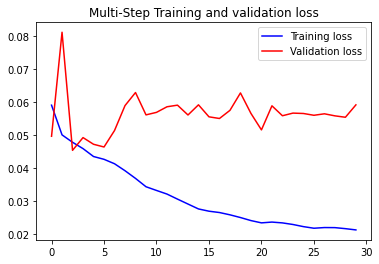

In [33]:
plot_train_history(multi_step_history5, 'Multi-Step Training and validation loss')

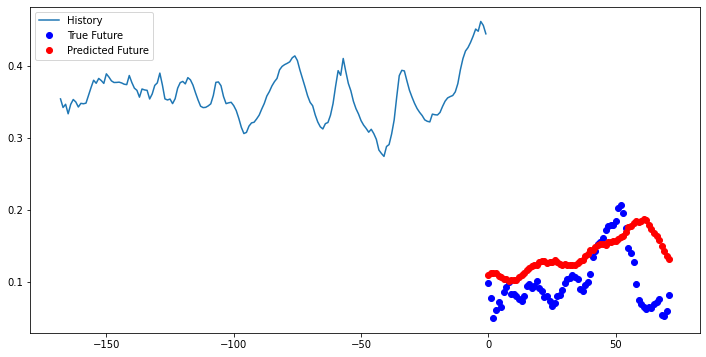

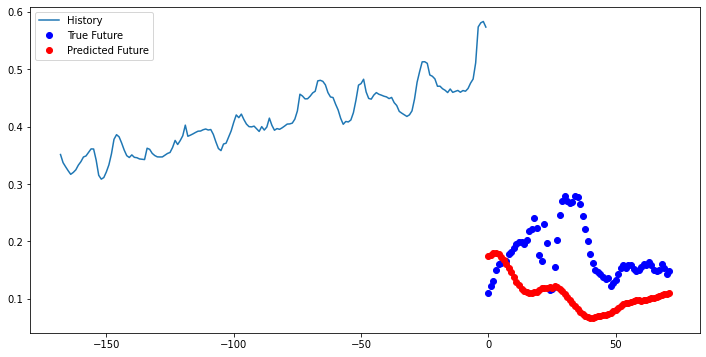

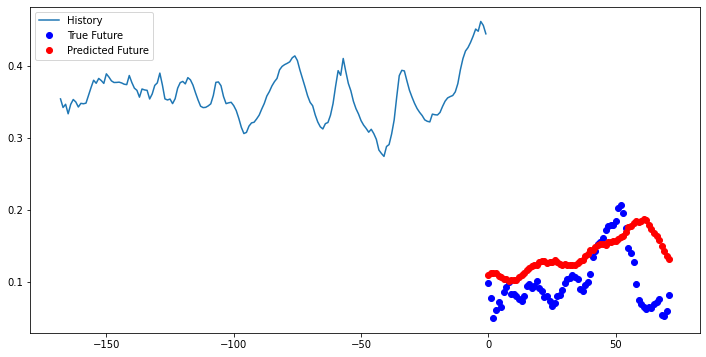

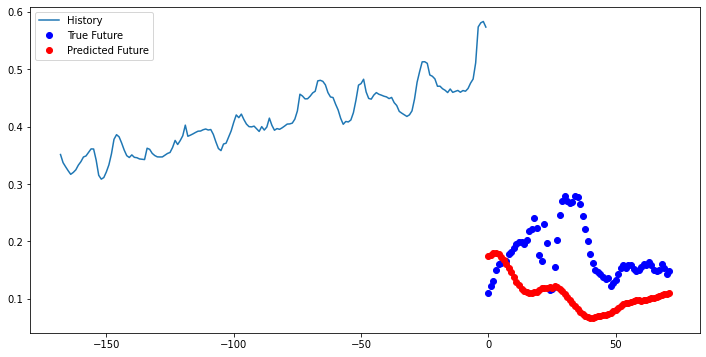

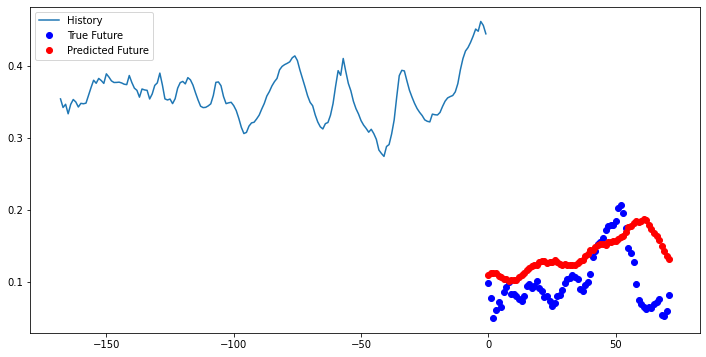

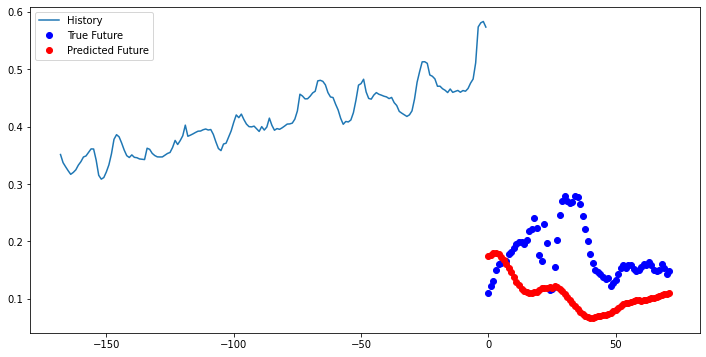

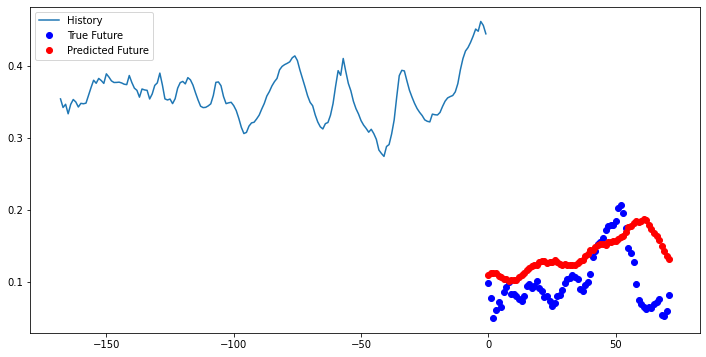

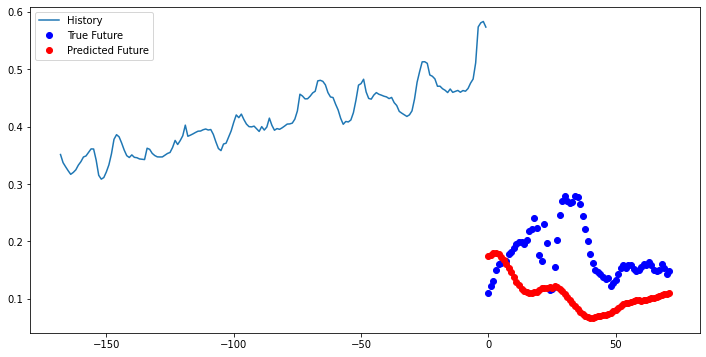

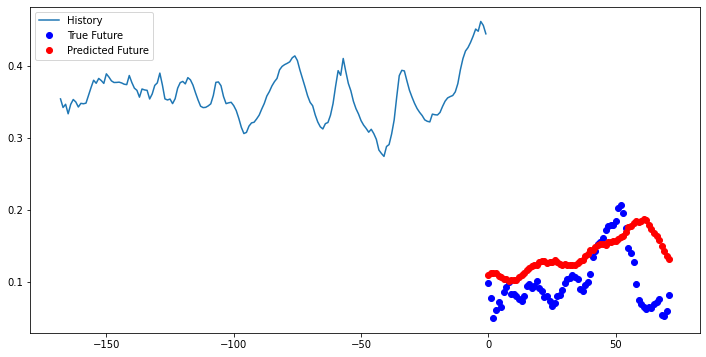

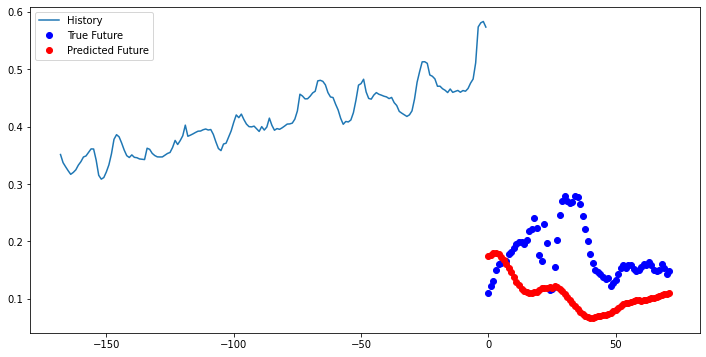

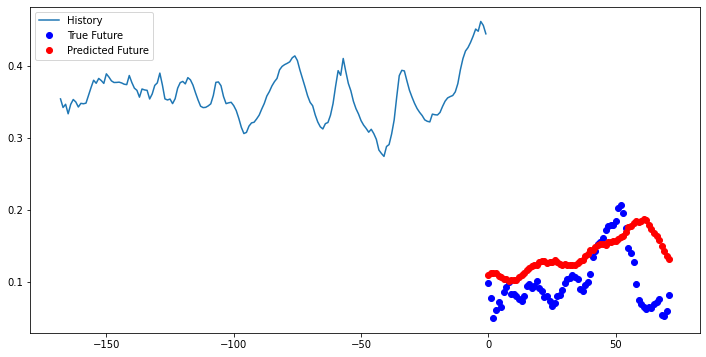

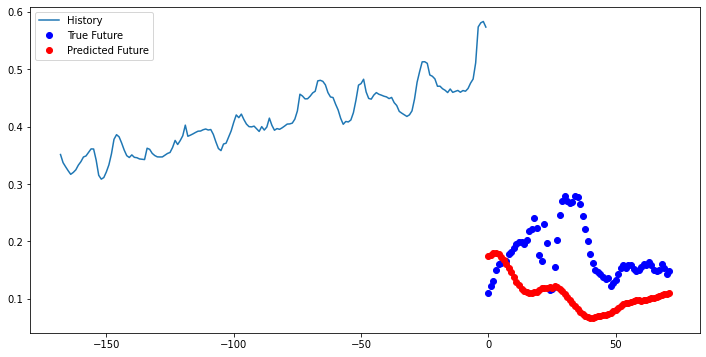

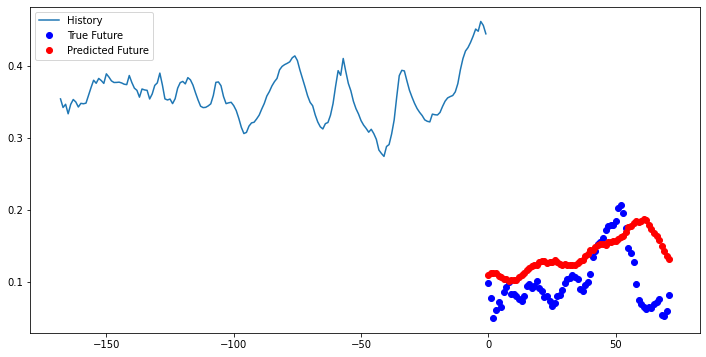

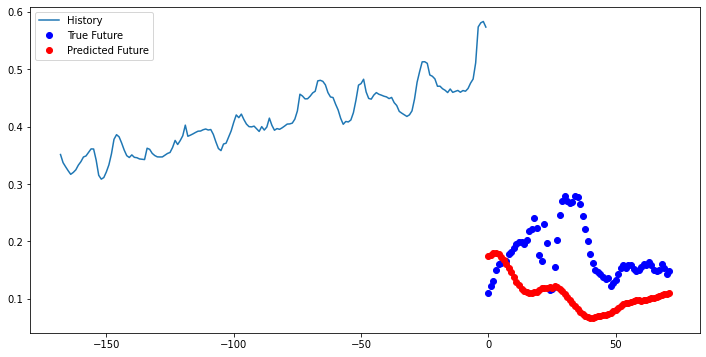

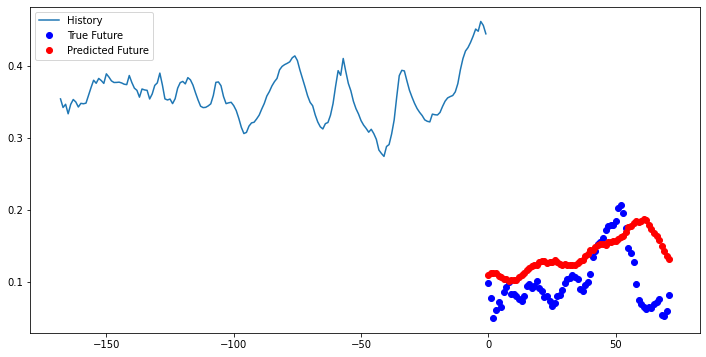

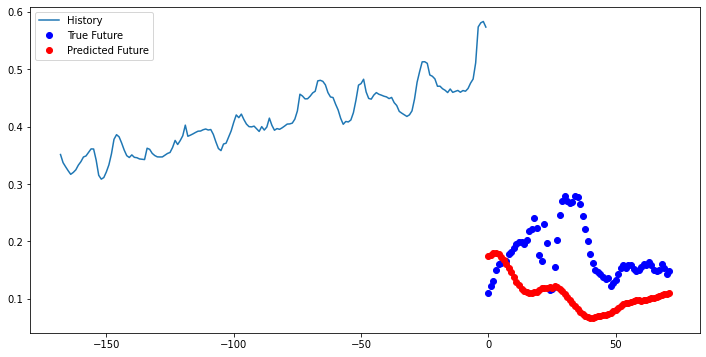

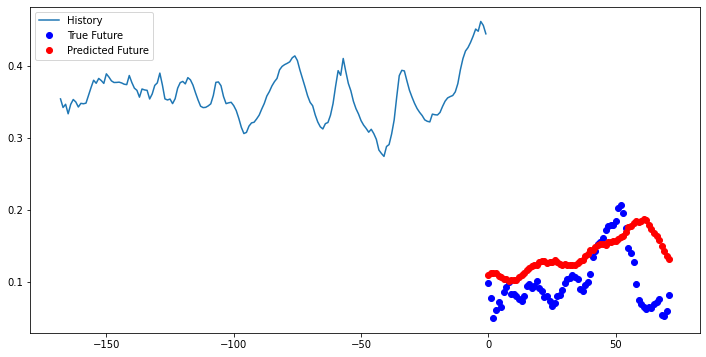

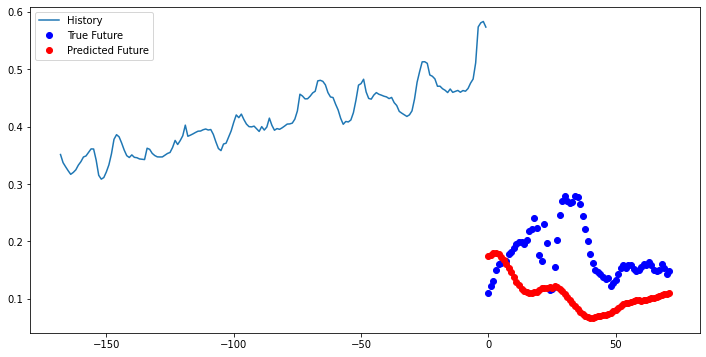

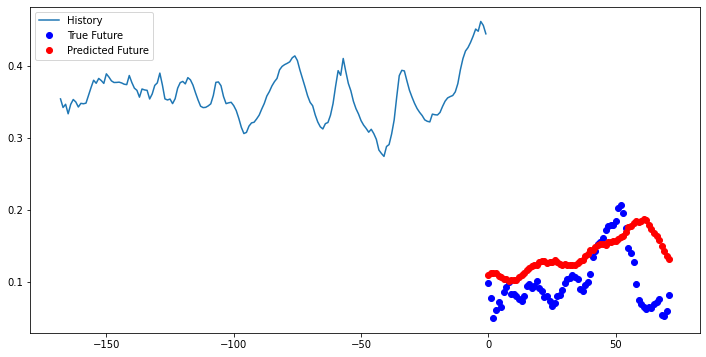

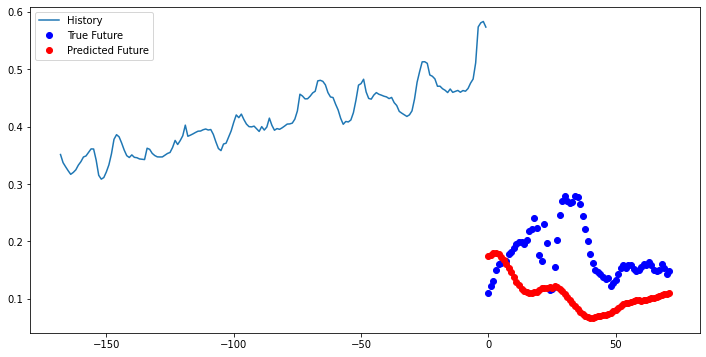

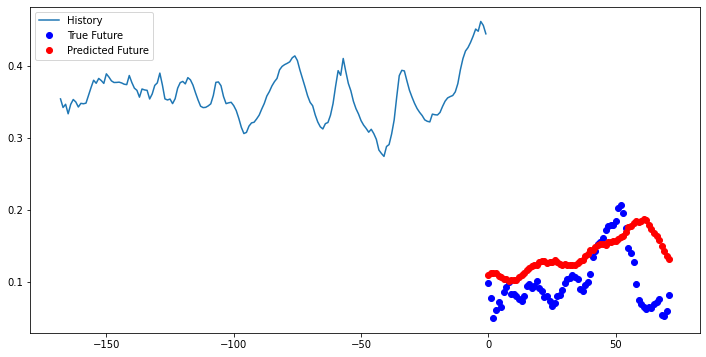

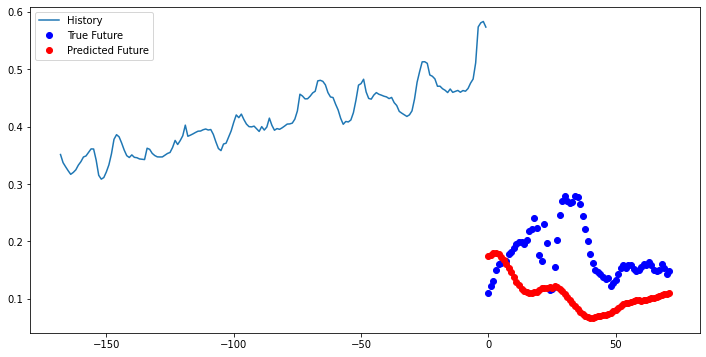

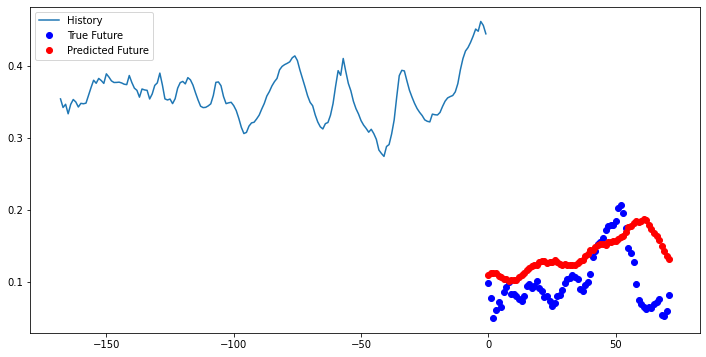

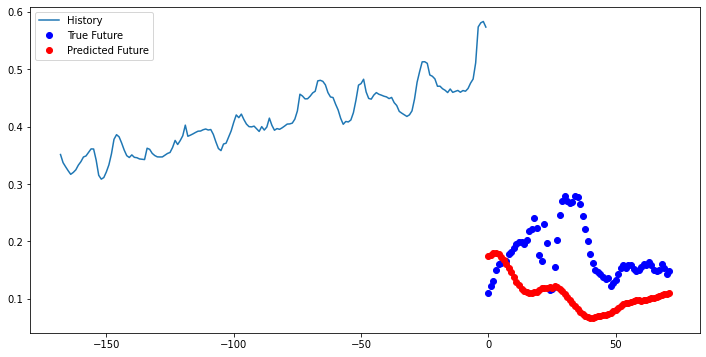

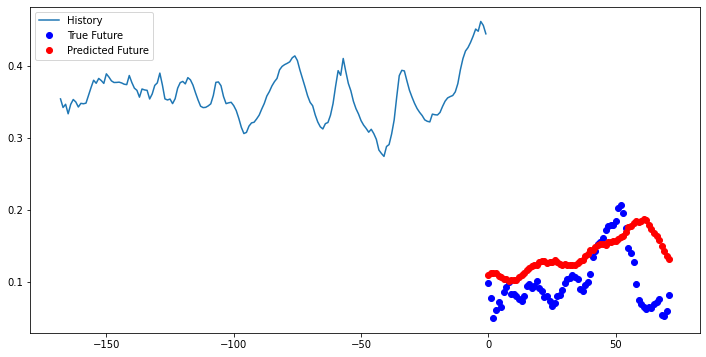

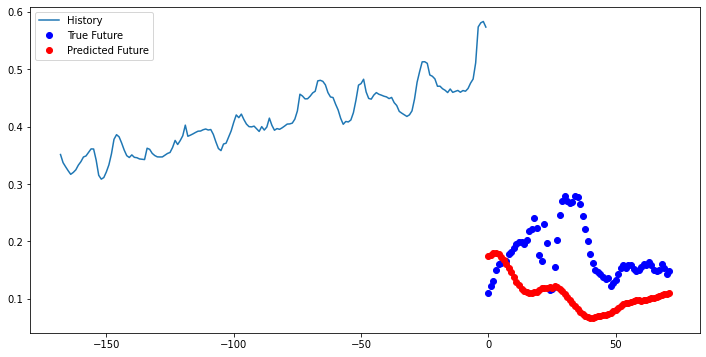

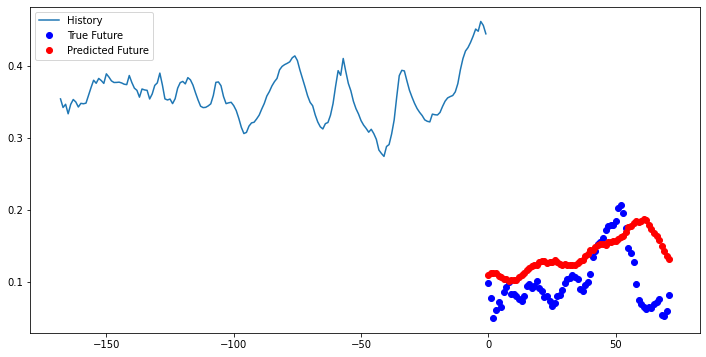

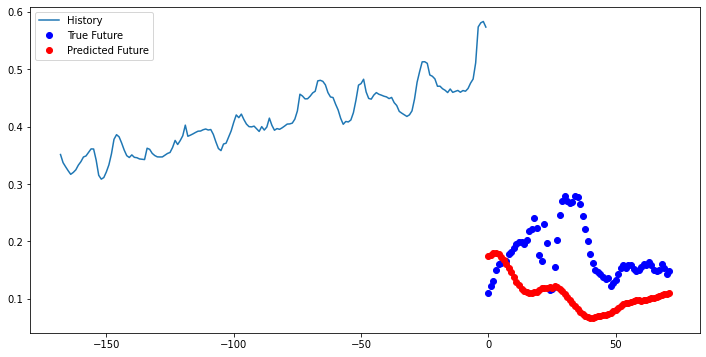

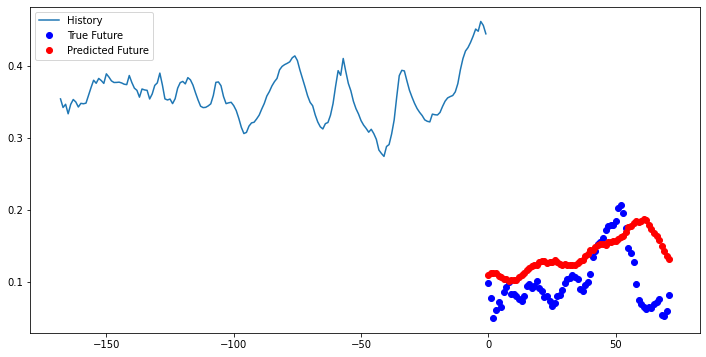

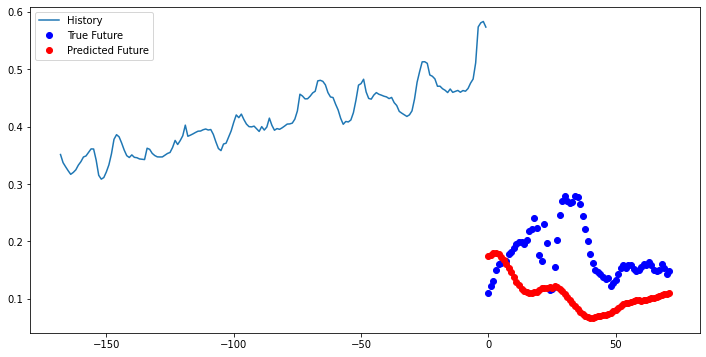

In [43]:
for x, y in val_data_multi.take(30):
  multi_step_plot(x[0], y[0], multi_step_model5.predict(x)[0])

## model6



In [21]:
multi_step_model6 = tf.keras.models.Sequential()
multi_step_model6.add(tf.keras.layers.LSTM(168,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:],  activation='relu'))
multi_step_model6.add(tf.keras.layers.LSTM(168,
                                          return_sequences=True,
                                            activation='relu'))
multi_step_model6.add(Dropout(0.2))
multi_step_model6.add(tf.keras.layers.LSTM(100,return_sequences=True, activation='relu'))
multi_step_model6.add(Dropout(0.2))
multi_step_model6.add(tf.keras.layers.LSTM(100,return_sequences=True, activation='relu'))
multi_step_model6.add(Dropout(0.2))
multi_step_model6.add(tf.keras.layers.LSTM(50, activation='relu'))
multi_step_model6.add(Dropout(0.2))
multi_step_model6.add(tf.keras.layers.Dense(72))

multi_step_model6.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [22]:
multi_step_history6 = multi_step_model6.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 290s 1s/step - loss: 20910323158482944.0000 - val_loss: 0.0476
Epoch 2/30
200/200 [==============================] - 290s 1s/step - loss: 1.0074 - val_loss: 0.0484
Epoch 3/30
200/200 [==============================] - 289s 1s/step - loss: 0.0536 - val_loss: 0.0538
Epoch 4/30
200/200 [==============================] - 288s 1s/step - loss: 511465440.0000 - val_loss: 0.0508
Epoch 5/30
200/200 [==============================] - 284s 1s/step - loss: 8963437042688065536.0000 - val_loss: 0.0496
Epoch 6/30
200/200 [==============================] - 284s 1s/step - loss: 125449961472.0000 - val_loss: 0.0490
Epoch 7/30
200/200 [==============================] - 282s 1s/step - loss: 0.0495 - val_loss: 0.0437
Epoch 8/30
200/200 [==============================] - 281s 1s/step - loss: 26322545863469039616.0000 - val_loss: 0.0458
Epoch 9/30
200/200 [==============================] - 280s 1s/step - loss: 488873.3125 - val_loss: 0.0462
Epoch 10/30
20

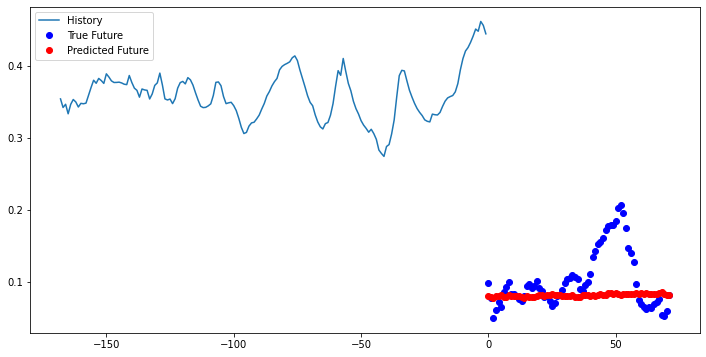

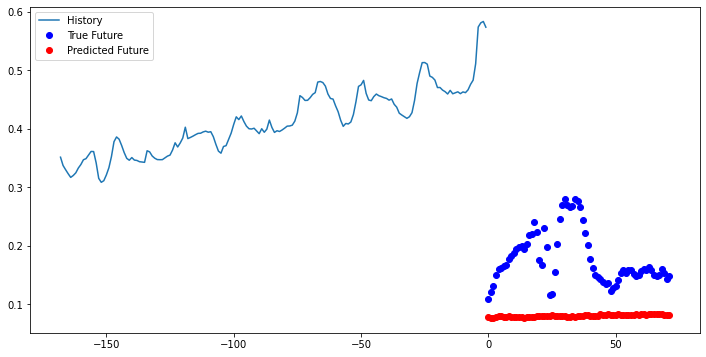

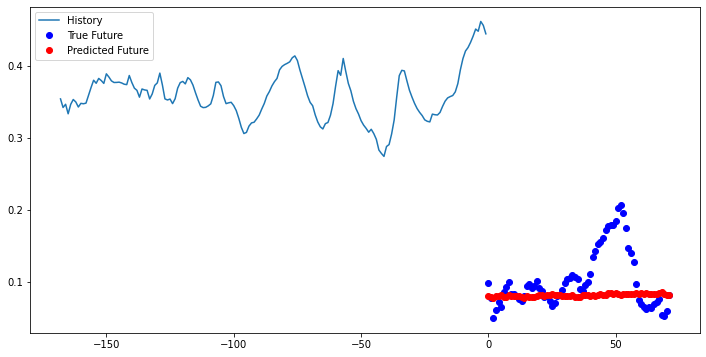

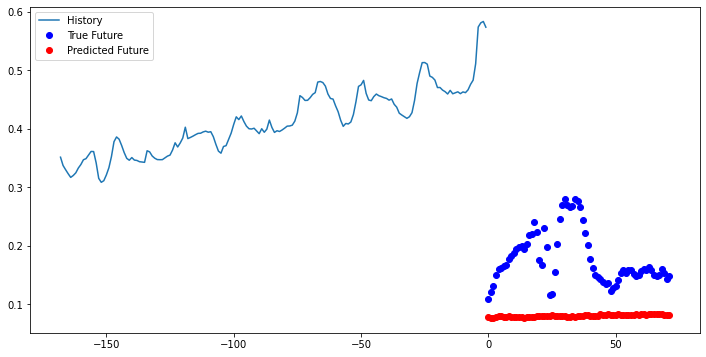

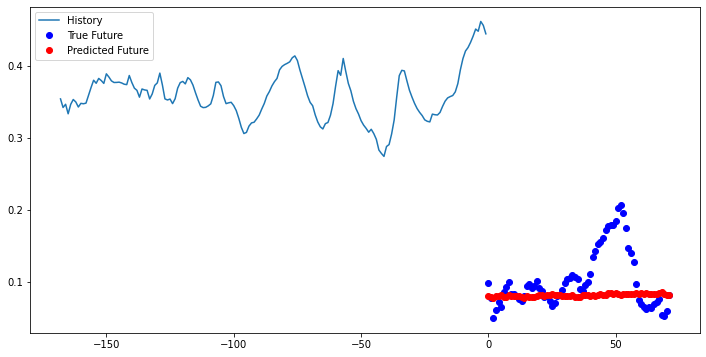

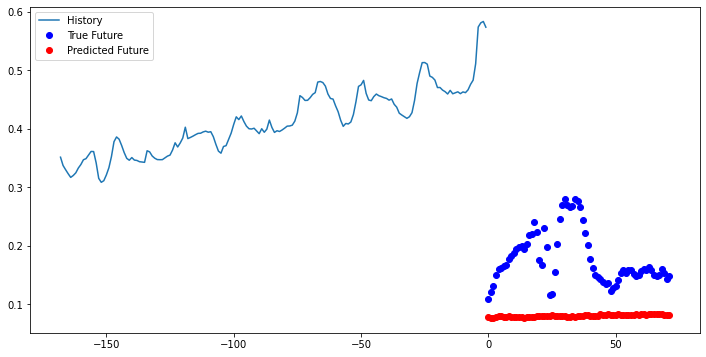

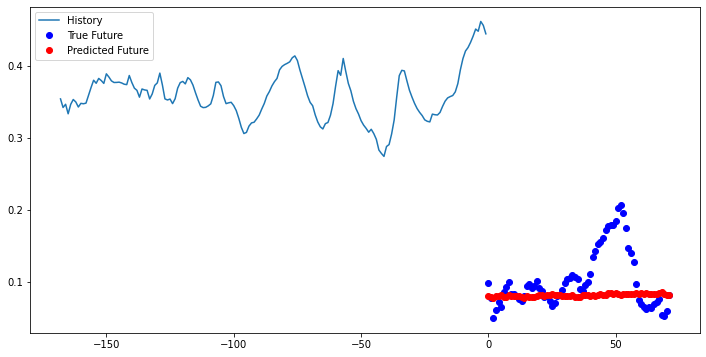

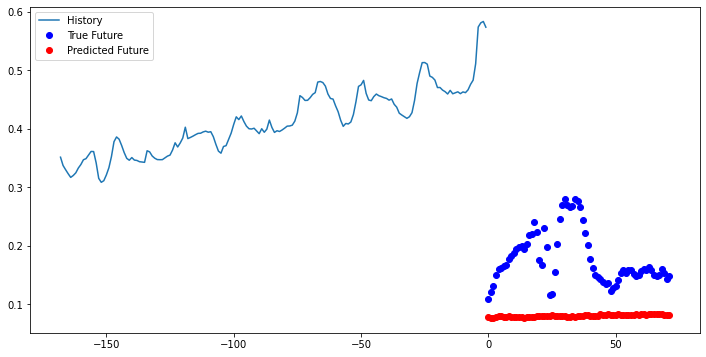

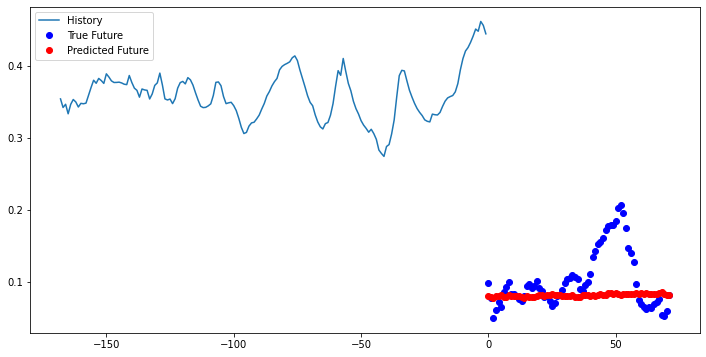

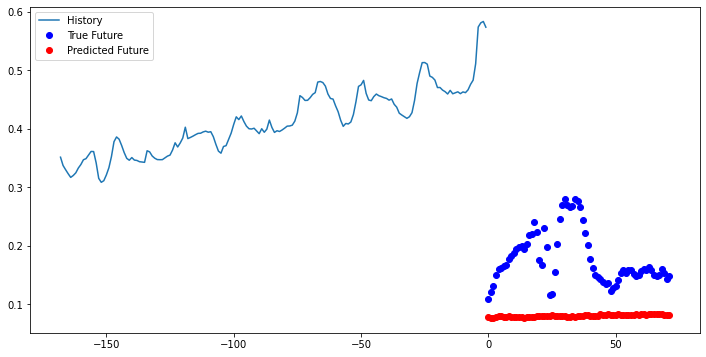

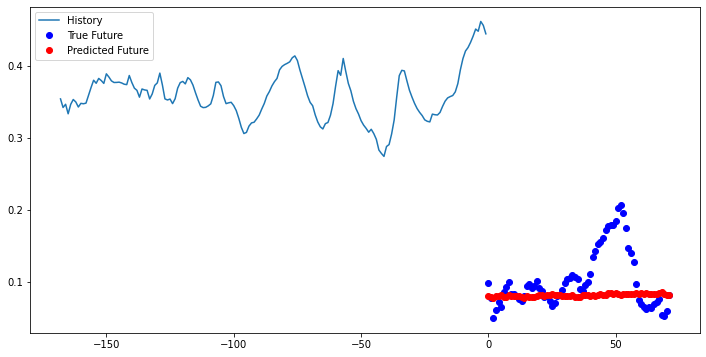

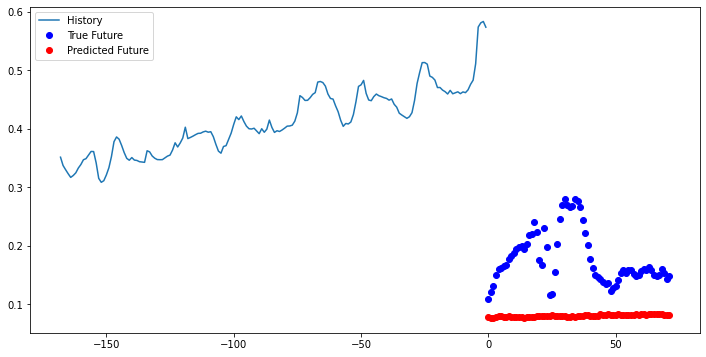

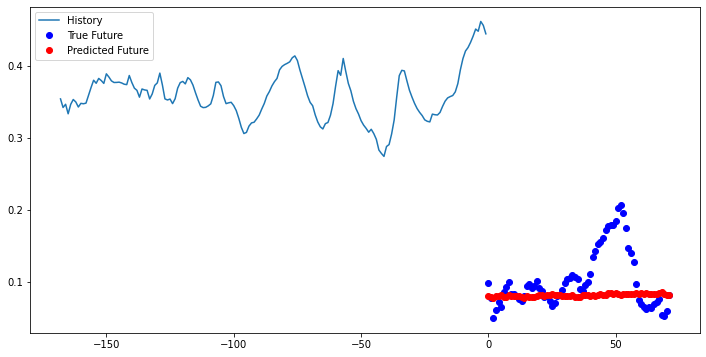

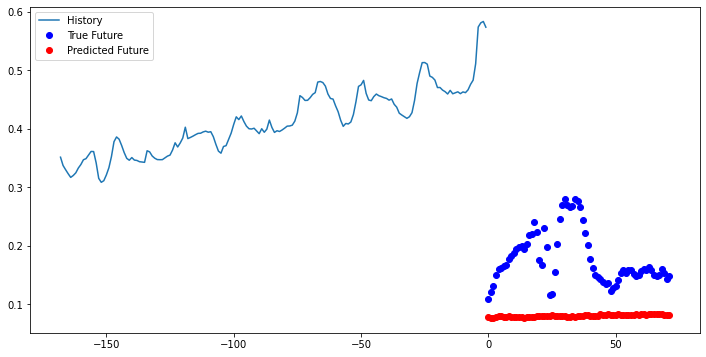

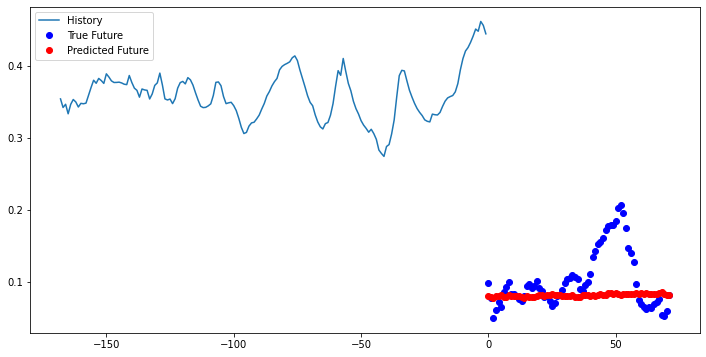

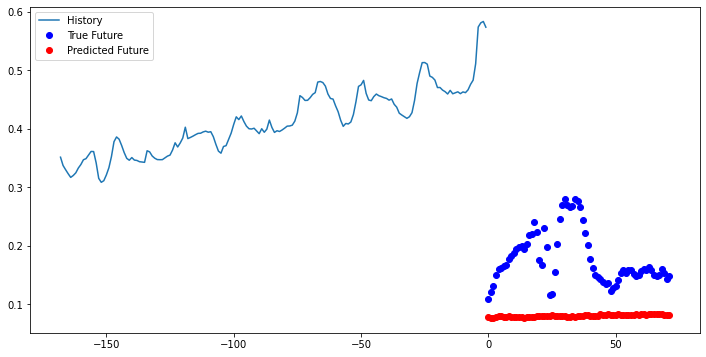

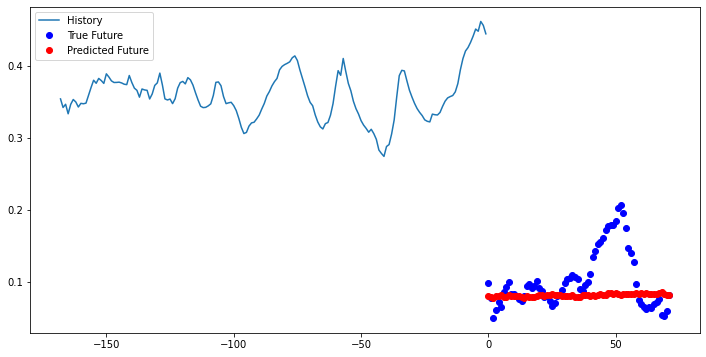

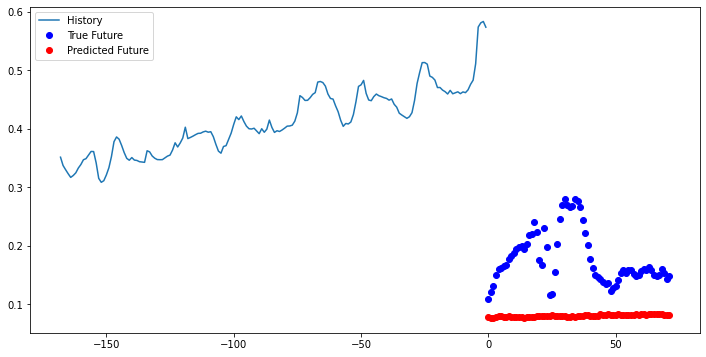

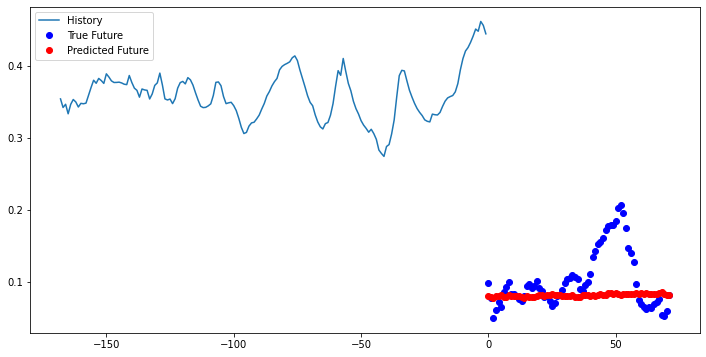

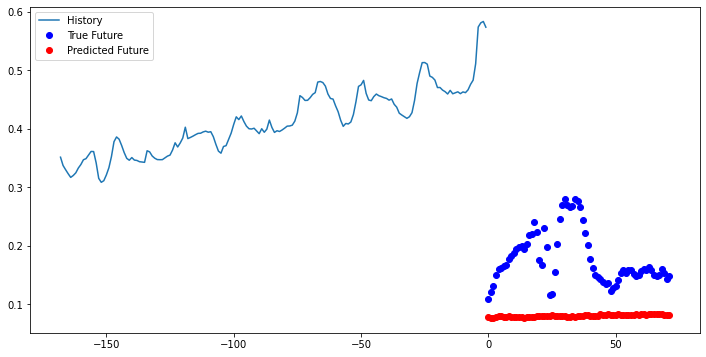

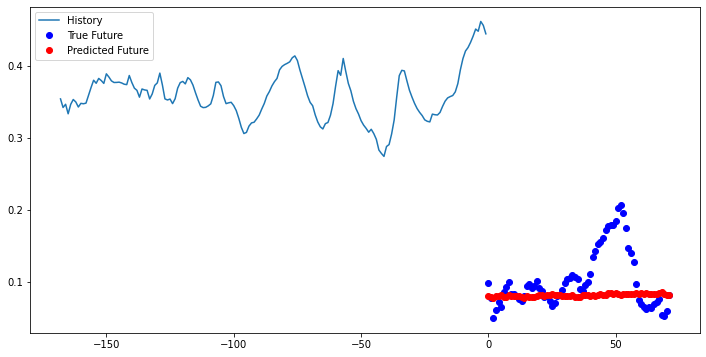

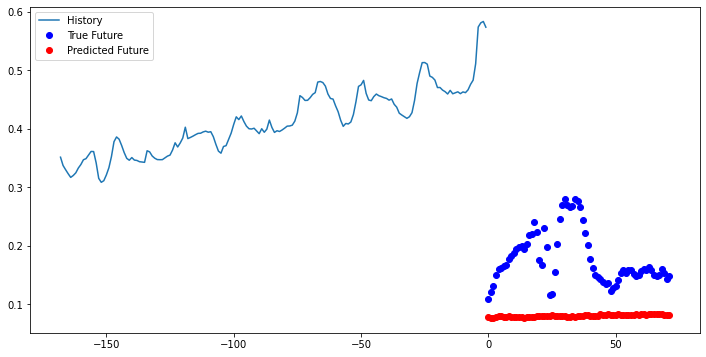

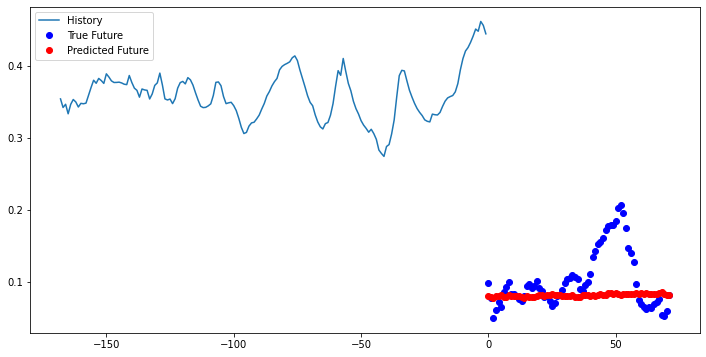

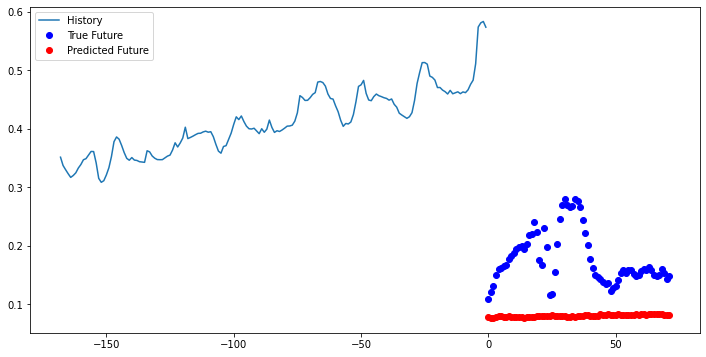

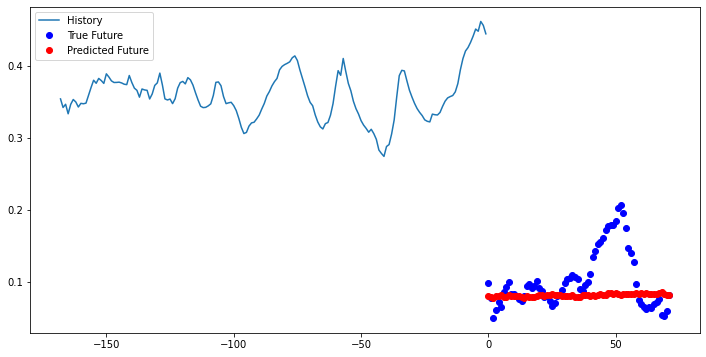

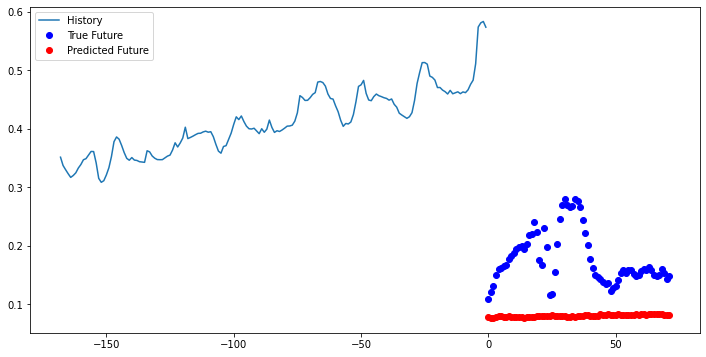

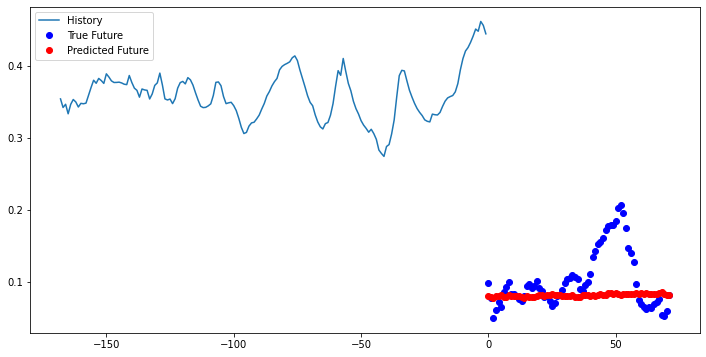

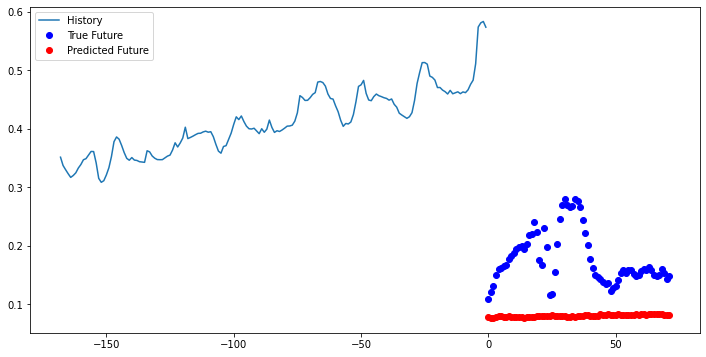

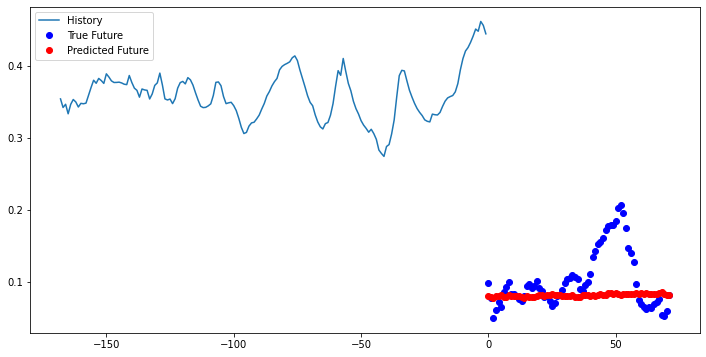

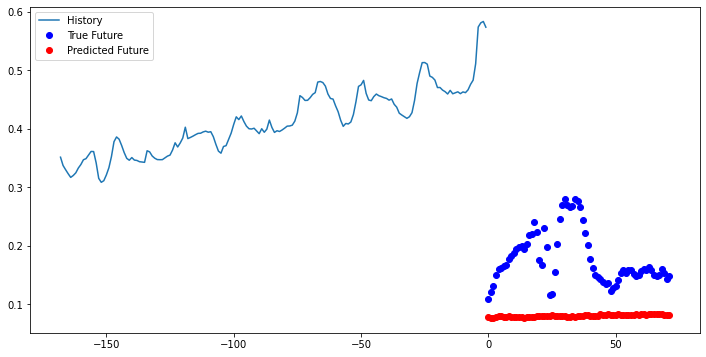

In [26]:
for x, y in val_data_multi.take(30):
  multi_step_plot(x[0], y[0], multi_step_model6.predict(x)[0])

### bibliografia:





*   https://www.tensorflow.org/tutorials/structured_data/time_series
*   https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


*   https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
*   https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/4


*   https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/
*  https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/



*   https://colah.github.io/posts/2015-08-Understanding-LSTMs/
*  https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21



*    https://machinelearningmastery.com/stacked-long-short-term-memory-networks/   
*   https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9












